<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep8-9/Ejercicio9Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image
from csv import reader
from pandas.core.api import DataFrame

Mounted at /content/drive


In [3]:
# Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df = pd.read_csv("/content/drive/MyDrive/Data/CarPrice_Assignment.csv")

In [4]:
# df means 'data frame'
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Verificamos el tamaño de los datos
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 1. Separate Numerical and Categorical data

In [8]:
# Separate Numerical and Categorical data
# Podemos crear arreglos de la columna deseada de la siguiente forma

# Numercial Data: |car_ID|, |symboling|, |wheelbase|, |enginesize|, |boreratio|, |stroke|, |compresratio|, |horsepower|, |peakrpm|, |citympg|, |highwaympg|, |price|

carID = df['car_ID'].astype(int).values
symboling = df['symboling'].astype(int).values
wheelbase = df['wheelbase'].astype(float).values
enginsize = df['enginesize'].astype(int).values
boreratio = df['boreratio'].astype(float).values
stroke = df['stroke'].astype(float).values
compresratio = df['compressionratio'].astype(float).values
horsepower = df['horsepower'].astype(int).values
peakrpm = df['peakrpm'].astype(int).values
citympg = df['citympg'].astype(int).values
highwaympg = df['highwaympg'].astype(int).values
price = df['price'].astype(float).values

# Categorical Data: |CarName|, |fueltype|, |aspiration|, |doornumber|, |carbody|, |drivewheel|, |enginelocation|, |fuelsystem|

carName = df['CarName'].astype(object).values
fuelType = df['fueltype'].astype(object).values
aspiration = df['aspiration'].astype(object).values
doornumber = df['doornumber'].astype(object).values
carbody = df['carbody'].astype(object).values
drivewheel = df['drivewheel'].astype(object).values
enginelocation = df['enginelocation'].astype(object).values
fuelsystem = df['fuelsystem'].astype(object).values

In [9]:
# Observamos que tipos de datos tenemos para poder clasificarlos
df.info() # Todos los datos tipo 'object' son categoricos y los demas datos son numericos ya que son 'int64' o 'float64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# 2.Analiza la dependencia del valor del auto como función de cada variable categorica

In [10]:
# Analiza la dependencia del valor del auto como función de cada variable categorica

# Separamos el nombre de la compañia de la columna CarName
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, "Compañia", CompanyName)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,car_ID,symboling,Compañia,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Ahora tenemos el dato necesario, pero algunos nombres de marca contienen errores
df.Compañia.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
# Necesitamos arreglar los errores, creamos una funcion para ello
df.Compañia = df.Compañia.str.lower()

def replace_name(a,b):
  df.Compañia.replace(a, b, inplace=True)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

# Verificamos que corregimos todos los errores
df.Compañia.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

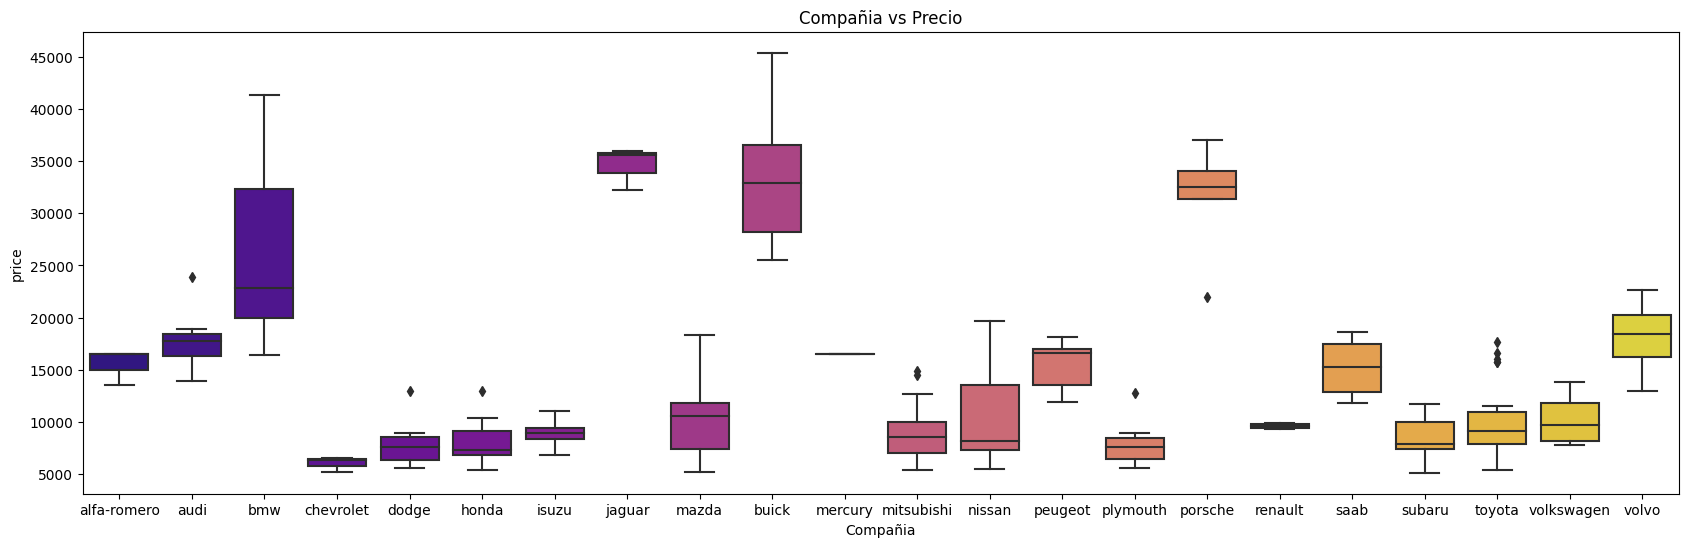

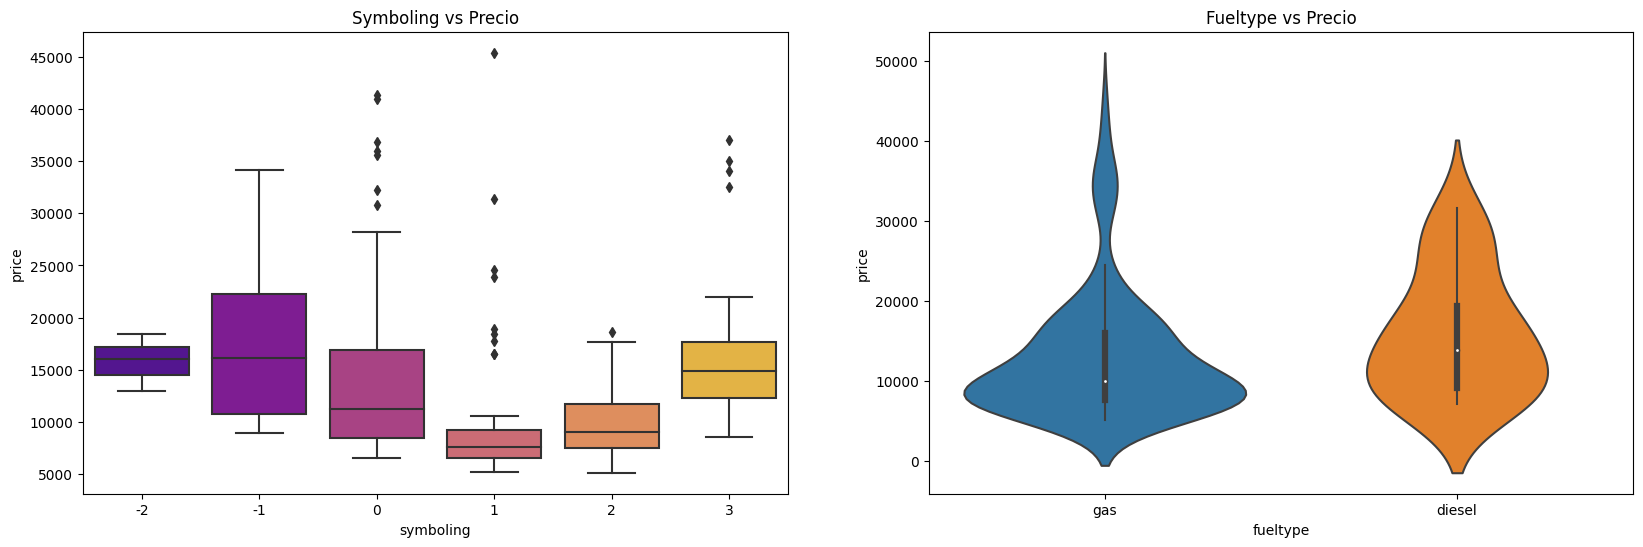

In [52]:
# Ahora podemos visualizar los datos con respecto al precio

# Primero la Compañia vs Precio
plt.figure(figsize=(70,6))

plt.subplot(1,3,1)
plt.title('Compañia vs Precio')
sns.boxplot(x=df.Compañia, y=df.price, palette=("plasma"))

# Symboling vs Precio
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Symboling vs Precio')
sns.boxplot(x=df.symboling, y=df.price, palette=("plasma"))

# Fueltype vs Precio
plt.subplot(1,2,2)
plt.title('Fueltype vs Precio')
sns.violinplot(x=df["fueltype"], y=df["price"])

plt.show()

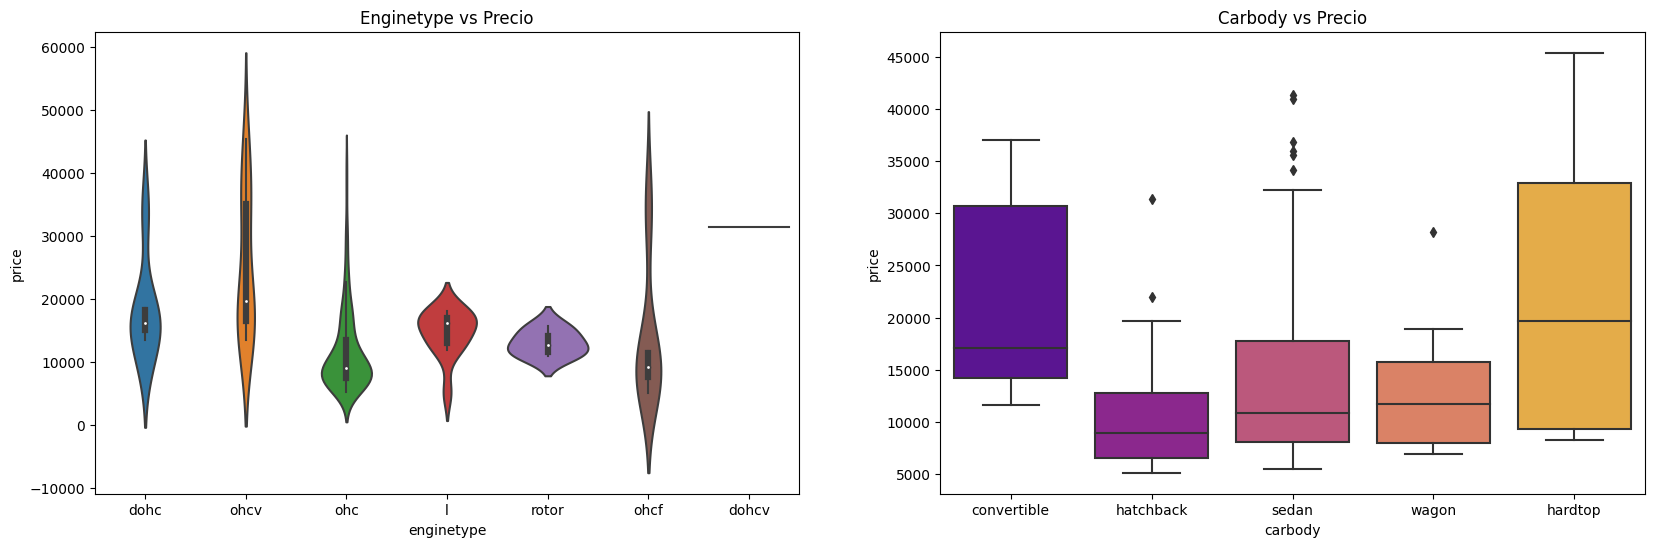

In [58]:
plt.figure(figsize=(20,6))

# Enginetype vs Precio
plt.subplot(1,2,1)
plt.title('Enginetype vs Precio')
sns.violinplot(x=df["enginetype"], y=df["price"])

# Carbody vs Precio
plt.subplot(1,2,2)
plt.title('Carbody vs Precio')
sns.boxplot(x=df.carbody, y=df.price, palette=("plasma"))

plt.show()

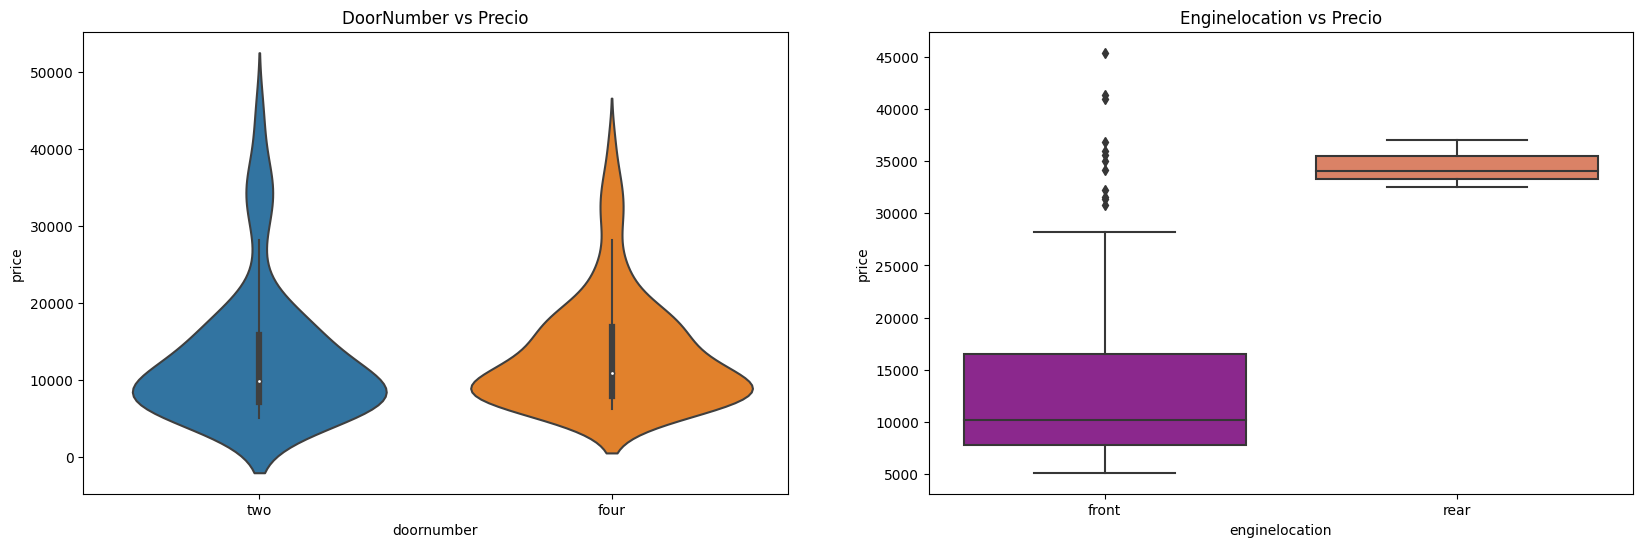

In [59]:
plt.figure(figsize=(20,6))

# Doornumber vs Precio
plt.subplot(1,2,1)
plt.title('DoorNumber vs Precio')
sns.violinplot(x=df["doornumber"], y=df["price"])

# Enginelocation vs Precio
plt.subplot(1,2,2)
plt.title('Enginelocation vs Precio')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("plasma"))

plt.show()

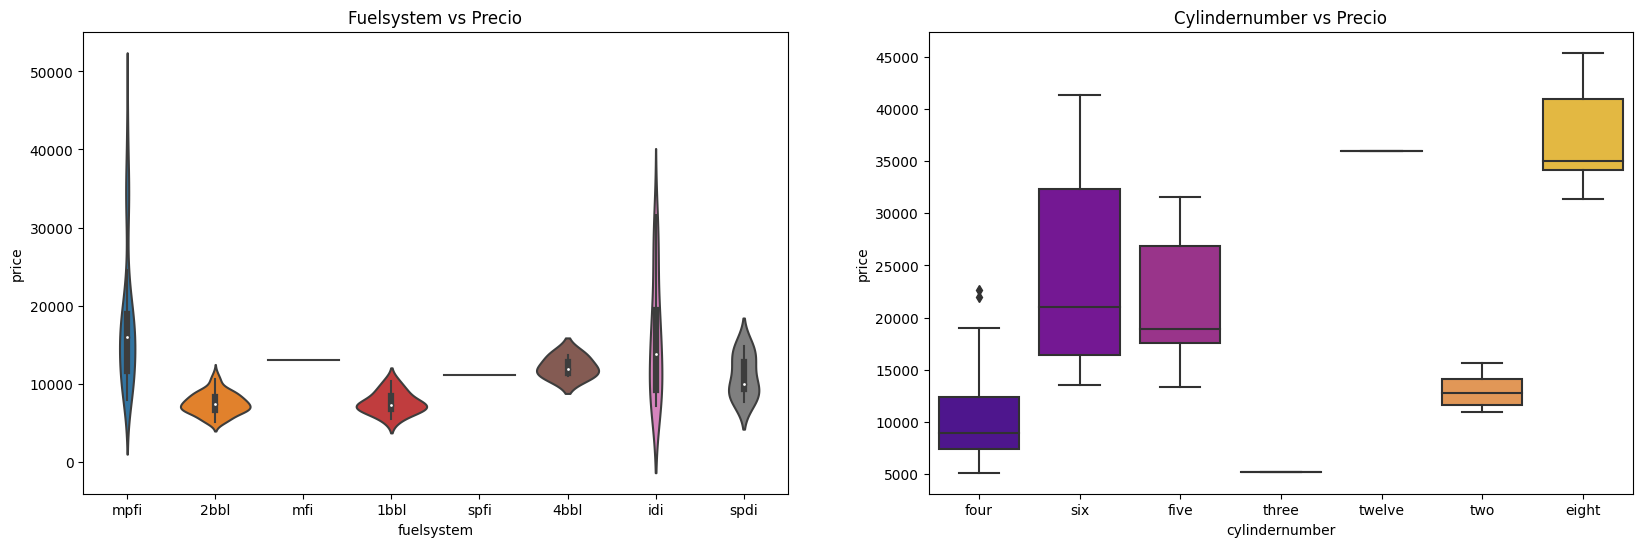

In [61]:
plt.figure(figsize=(20,6))

# Fuelsystem vs Precio
plt.subplot(1,2,1)
plt.title('Fuelsystem vs Precio')
sns.violinplot(x=df["fuelsystem"], y=df["price"])

# Cylindernumber vs Precio
plt.subplot(1,2,2)
plt.title('Cylindernumber vs Precio')
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("plasma"))

plt.show()

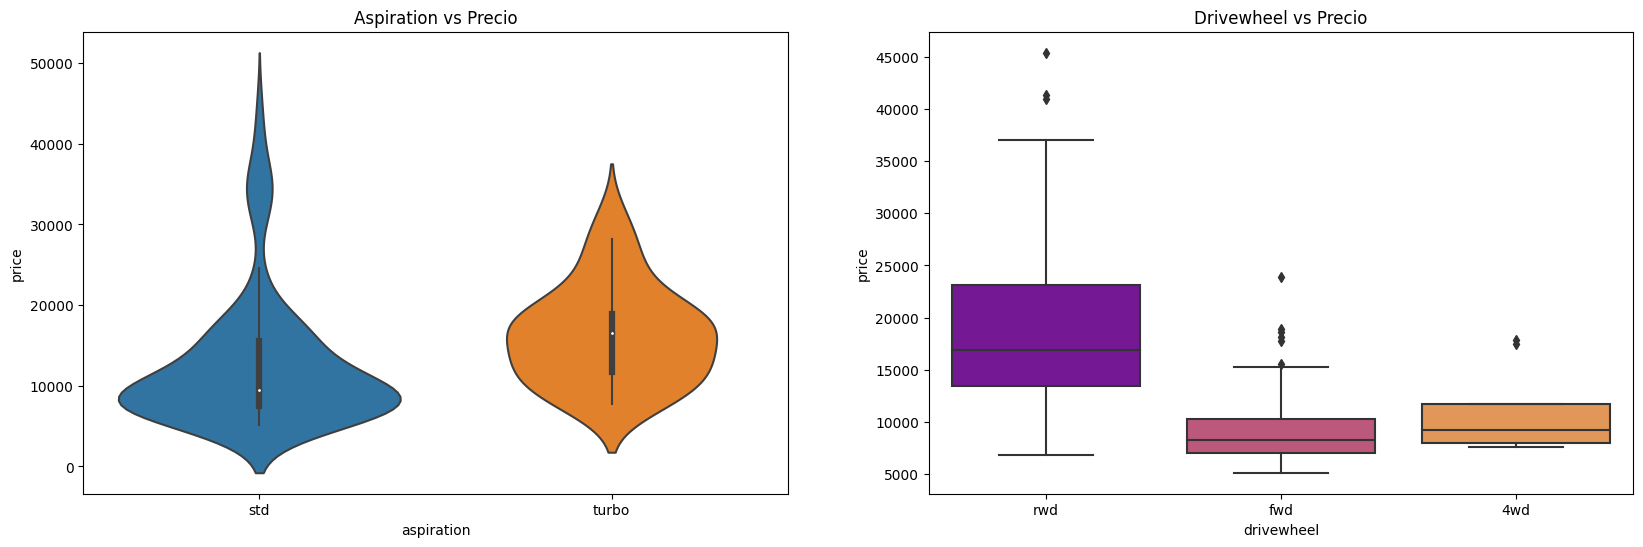

In [62]:
plt.figure(figsize=(20,6))

# Aspiration vs Precio
plt.subplot(1,2,1)
plt.title('Aspiration vs Precio')
sns.violinplot(x=df["aspiration"], y=df["price"])

# Drivewheel vs Precio
plt.subplot(1,2,2)
plt.title('Drivewheel vs Precio')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("plasma"))

plt.show()

# 3. Analiza la dependencia del valor del auto como función de cada variable numerica

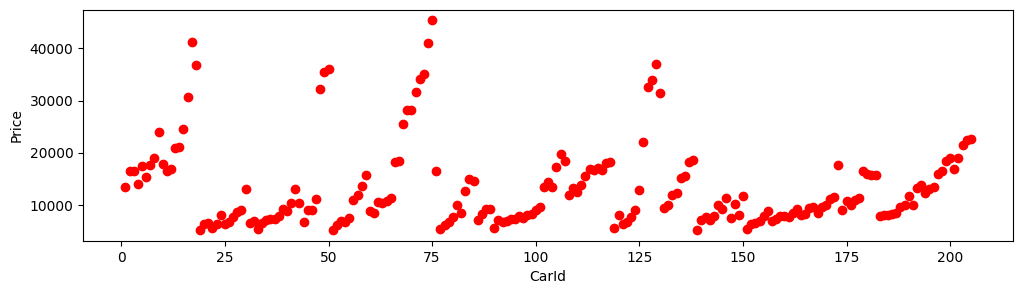

In [ ]:
# Analiza la dependencia del valor del auto como función de cada variable numerica

fig,ax = plt.subplots(1, 1, figsize=(12, 3))

ax.scatter(carID, price, color = "red")
ax.set_xlabel('CarId')
ax.set_ylabel('Price')
#ax[i].scatter(Xh[:,i], yp, color = "orange", label = 'predict')
#ax[i].set_xlabel(labels[i])

#ax[0].set_ylabel("Price"); ax[0].legend();
#fig.suptitle("Target vs Prediction using normalized model")
plt.show()

In [ ]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=[]
categorical_vars=[]

In [ ]:
#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df=df[use_vars]
df=pd.get_dummies(df,columns=categorical_vars,drop_first=True)

In [ ]:
#Checa la correlación entre todas las variables usando un "heat map"
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Construye la matriz de caracteristicas X y el vector de target t.
#Normaliza las caracteristicas y procede a generar el modelo.
# Usa el 20% de los datos como conjunto de validación
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
# Posteriormente utiliza scikit-learn para comprobar tu resultado

In [ ]:
#Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?